## Observations and Insights 

In [ ]:
# Based on the box plots, Ramicane looks to have a slightly better peformance in reducing the tumor volume on average with a little more consistency than Capomulin based on the box plots.
# Capomulin treatment of Mouse l509 showed significant improvement of tumor volume after 45 days.  However, the team may want to observe the mouse for a longer period to see if the trend continues.
# There looks to be a positive correlation between the mouse's weight and average tumor volume for the Capomulin regimen

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Display the data table for preview


In [52]:
# Check out the headers of the first file
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [53]:
# Check out the headers of the second file
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [54]:
# Combine the data into a single dataset
# Display the data table for preview
combine_mouse_study = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
combine_mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [55]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse = combine_mouse_study.loc[combine_mouse_study.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicated_mouse


array(['g989'], dtype=object)

In [56]:
# Optional: Get all the data for the duplicate mouse ID. 
view_duplicate = combine_mouse_study[combine_mouse_study["Mouse ID"]== 'g989']
view_duplicate


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [57]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combine_mouse_study[combine_mouse_study["Mouse ID"].isin(view_duplicate) == False]
cleaned_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [58]:
# Checking the number of mice in the clean DataFrame.
count_mice = len(cleaned_data["Mouse ID"].unique())
count_mice

249

## Summary Statistics

In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_stats = cleaned_data.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

tumor_mean = summary_stats.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_median = summary_stats.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_variance = summary_stats.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_std_dev = summary_stats.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_sem = summary_stats.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

stat_analysis = pd.DataFrame({"Mean Tumor Volume":tumor_mean,"Median Tumor Volume":tumor_median,"Tumor Volume Variance":tumor_variance, "Tumor Volume Std. Dev": tumor_std_dev, "Tumor Volume Std. Err": tumor_sem})

stat_analysis



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


Text(0.5, 1.0, 'Tumor Volume Summary')

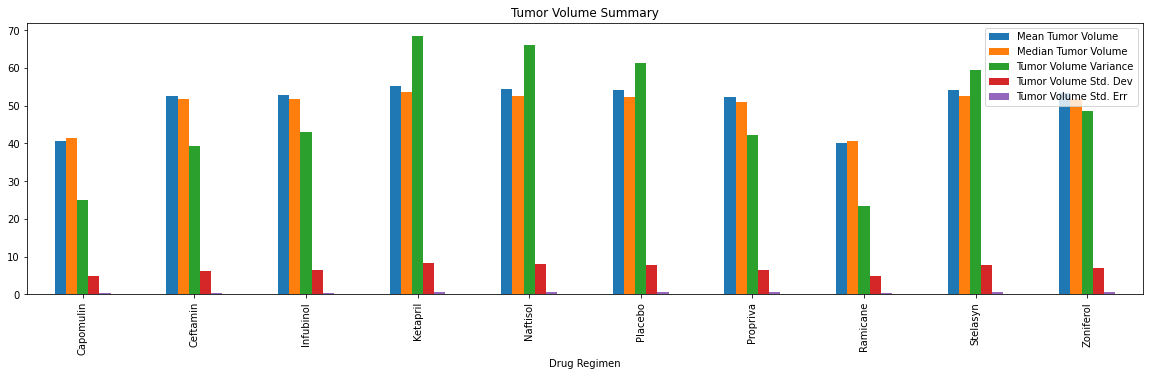

In [61]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
cluster_bar_plot = stat_analysis.plot(kind="bar", figsize=(20,5))
plt.title("Tumor Volume Summary")

## Bar and Pie Charts

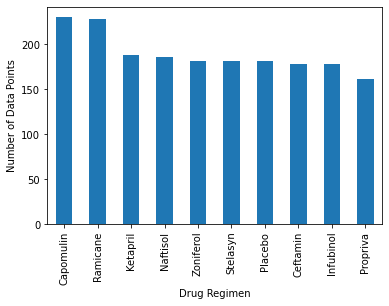

In [82]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot. 
trial_counts = cleaned_data["Drug Regimen"].value_counts()

trial_counts.plot(kind="bar", label='index')

# Add graph atttributes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(rotation=90)
plt.show()


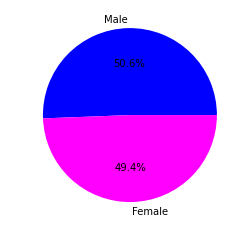

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count =cleaned_data["Sex"].value_counts()


labels = gender_count.index

sizes = gender_count.values

colors = ["blue", "magenta"]

gender_count.plot(kind="pie", colors=colors, autopct="%1.1f%%")


plt.ylabel(" ")
plt.show()


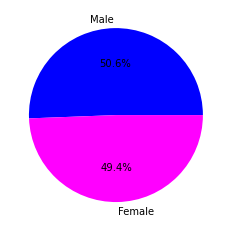

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = cleaned_data["Sex"].value_counts()

#Labels for each section
labels = gender_count.index

#Values of each section 
sizes = gender_count.values

colors = ["blue", "magenta"]

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")

plt.show()


## Quartiles, Outliers and Boxplots

In [65]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

final_tumor_vol = cleaned_data.groupby("Mouse ID").max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_data = final_tumor_vol[["Mouse ID","Timepoint"]].merge(cleaned_data, on=["Mouse ID","Timepoint"], how='left')

merge_data.round(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.97,2,Infubinol,Female,20,23
1,a251,45,65.53,1,Infubinol,Female,21,25
2,a262,45,70.72,4,Placebo,Female,17,29
3,a275,45,63.00,3,Ceftamin,Female,20,28
4,a366,30,63.44,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.71,0,Propriva,Female,12,26
245,z578,45,30.64,0,Ramicane,Male,11,16
246,z581,45,62.75,3,Infubinol,Female,24,25
247,z795,45,65.74,3,Naftisol,Female,13,29


In [66]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

capomulin_regimen = merge_data.loc[merge_data["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
ramicane_regimen = merge_data.loc[merge_data["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
infubinol_regimen =merge_data.loc[merge_data["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
ceftamin_regimen = merge_data.loc[merge_data["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]


# Quantitatively determine capomulin outliers

quartile_limits = capomulin_regimen.quantile([.25,.5,.75])
lower_limit = quartile_limits[.25]
upper_limit = quartile_limits[.75]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
iqr = upper_limit-lower_limit
  
# Determine outliers using upper and lower bounds

lower_outer_lim = lower_limit-(1.5*iqr)
upper_outer_lim = upper_limit+(1.5*iqr)

print(f"Capomulin Tumor Volume (mm3) below: {round(lower_outer_lim, 2)} are potential outliers")
print(f"Capomulin Tumor Volume (mm3) above: {round(upper_outer_lim, 2)} are potential outliers")

Capomulin Tumor Volume (mm3) below: 20.7 are potential outliers
Capomulin Tumor Volume (mm3) above: 51.83 are potential outliers


In [67]:
# Quantitatively determine ramicane outliers

quartile_limits = ramicane_regimen.quantile([.25,.5,.75])
lower_limit = quartile_limits[.25]
upper_limit = quartile_limits[.75]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
iqr = upper_limit-lower_limit
  
# Determine outliers using upper and lower bounds

lower_outer_lim = lower_limit-(1.5*iqr)
upper_outer_lim = upper_limit+(1.5*iqr)

print(f"Ramicane Tumor Volume (mm3) below: {round(lower_outer_lim, 2)} are potential outliers")
print(f"Ramicane Tumor Volume (mm3) above: {round(upper_outer_lim, 2)} are potential outliers")

Ramicane Tumor Volume (mm3) below: 17.91 are potential outliers
Ramicane Tumor Volume (mm3) above: 54.31 are potential outliers


In [68]:
# Quantitatively determine infubinol outliers

quartile_limits = infubinol_regimen.quantile([.25,.5,.75])
lower_limit = quartile_limits[.25]
upper_limit = quartile_limits[.75]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
iqr = upper_limit-lower_limit
  
# Determine outliers using upper and lower bounds

lower_outer_lim = lower_limit-(1.5*iqr)
upper_outer_lim = upper_limit+(1.5*iqr)

print(f"Infubinol Tumor Volume (mm3) below: {round(lower_outer_lim, 2)} are potential outliers")
print(f"Infubinol Tumor Volume (mm3) above: {round(upper_outer_lim, 2)} are potential outliers")

Infubinol Tumor Volume (mm3) below: 36.83 are potential outliers
Infubinol Tumor Volume (mm3) above: 82.74 are potential outliers


In [69]:
# Quantitatively determine ceftamin outliers

quartile_limits = ceftamin_regimen.quantile([.25,.5,.75])
lower_limit = quartile_limits[.25]
upper_limit = quartile_limits[.75]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
iqr = upper_limit-lower_limit
  
# Determine outliers using upper and lower bounds

lower_outer_lim = lower_limit-(1.5*iqr)
upper_outer_lim = upper_limit+(1.5*iqr)

print(f"Ceftamin Tumor Volume (mm3) below: {round(lower_outer_lim, 2)} are potential outliers")
print(f"Ceftamin Tumor Volume (mm3) above: {round(upper_outer_lim, 2)} are potential outliers")

Ceftamin Tumor Volume (mm3) below: 25.36 are potential outliers
Ceftamin Tumor Volume (mm3) above: 87.67 are potential outliers


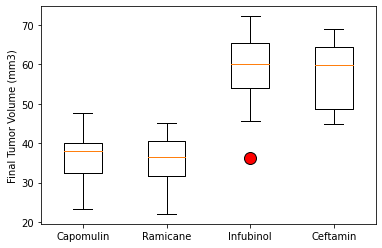

In [70]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='red',markersize=12)

#Make Box Plot
plt.boxplot([capomulin_regimen,ramicane_regimen, infubinol_regimen, ceftamin_regimen], labels=["Capomulin","Ramicane","Infubinol","Ceftamin"], flierprops= orange_out)

# Add y-axis label

plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

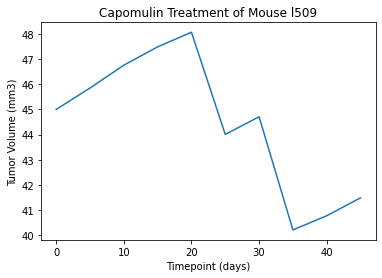

In [71]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_table = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin"]
capomulin_mouse = cleaned_data.loc[cleaned_data["Mouse ID"] == "l509"]

plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()


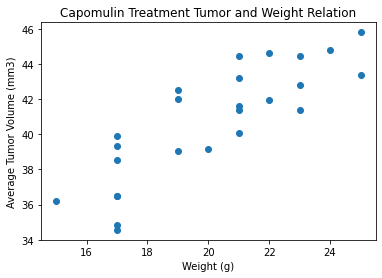

In [74]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

mouse_weight = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin"]

average_tumor_vol = mouse_weight.groupby(["Mouse ID"]).mean()

plt.scatter(average_tumor_vol["Weight (g)"],average_tumor_vol["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Treatment Tumor and Weight Relation")
plt.show()

## Correlation and Regression

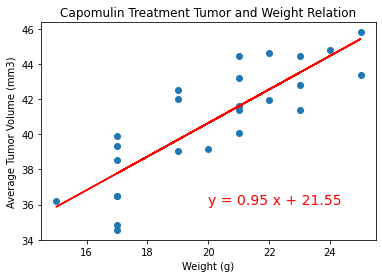

In [76]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept,rvalue, pvalue, stderr) = linregress(average_tumor_vol["Weight (g)"],average_tumor_vol["Tumor Volume (mm3)"])
regression_values = average_tumor_vol["Weight (g)"]* slope + intercept
line_function = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(average_tumor_vol["Weight (g)"],average_tumor_vol["Tumor Volume (mm3)"] )
plt.plot(average_tumor_vol["Weight (g)"], regression_values, color='red')
plt.annotate(line_function,(20,36), color='red', fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Treatment Tumor and Weight Relation")
plt.show()


In [77]:
 print(f" The correlation between mouse weight and average tumor volume is {round(rvalue,2)}")

 The correlation between mouse weight and average tumor volume is 0.84
